# Simple Tracking
## Load necessary Modules

In [27]:
from pyDA.FixedAlgebra import FTps
import pyDA.FixedAlgebra as fa
from pyDA.FixedAlgebra import FVector, FMatrix, FArray1D, FArray2D
import numpy as np

import matplotlib.pyplot as plt

## Initialize Truncation Order

In [28]:
order = 4
FTps.setGlobalTruncOrder(order)

## Initialize Variables

In [29]:
from enum import IntEnum
class SIXVect(IntEnum):
    X  = 0
    PX = 1
    Y  = 2
    PY = 3
    Z  = 4
    PZ = 5

x  = FTps.makeVariable(SIXVect.X)
px = FTps.makeVariable(SIXVect.PX)
y  = FTps.makeVariable(SIXVect.Y)
py = FTps.makeVariable(SIXVect.PY)
z  = FTps.makeVariable(SIXVect.Z)
pz = FTps.makeVariable(SIXVect.PZ)

## Define Hamiltontian

In [30]:
def Hosc(k, order): # Oscillation Hamiltonian as an example
        return ( 0.5*px*px + 0.5*k*x*x + 0.1*x*x*x)
        
    
def Hring(order):
        return (0.5*px*px + 0.5*py*py + 0.5*x*x + 0.5*y*y + x*x*y - 0.3*y*y*y)

## Oscillation Hamiltonian as an example
### Initialize Hamiltonian

In [31]:
H = Hosc(0.1,order)
print (H)

Tps 2 3 EXACT  6
    5.00000000000000e-02  2  0  0  0  0  0
    5.00000000000000e-01  0  2  0  0  0  0
    1.00000000000000e-01  3  0  0  0  0  0
    0.00000000000000e+00 -1 -1 -1 -1 -1 -1



### Lie Transformation

In [32]:
M =  fa.ExpMap(-H, order)
print (M)

FVps 6
Tps 1 4 4  6
    9.50415280255183e-01  1  0  0  0  0  0
    9.83416468529291e-01  0  1  0  0  0  0
   -1.46295514802279e-01  2  0  0  0  0  0
   -9.75248599689254e-02  1  1  0  0  0  0
   -2.45864443217206e-02  0  2  0  0  0  0
    7.25358305274582e-03  3  0  0  0  0  0
    7.28859177267480e-03  2  1  0  0  0  0
    2.43383341593864e-03  1  2  0  0  0  0
    3.49774981072473e-04  0  3  0  0  0  0
   -3.61840355956690e-04  4  0  0  0  0  0
   -4.13935145933191e-04  3  1  0  0  0  0
   -1.94519432783992e-04  2  2  0  0  0  0
   -4.33223422576952e-05  1  3  0  0  0  0
   -4.35402084249588e-06  0  4  0  0  0  0
    0.00000000000000e+00 -1 -1 -1 -1 -1 -1
Tps 1 4 4  6
   -9.83416468529291e-02  1  0  0  0  0  0
    9.50415280255183e-01  0  1  0  0  0  0
   -2.85272454561895e-01  2  0  0  0  0  0
   -2.87673740740215e-01  1  1  0  0  0  0
   -9.75248599689254e-02  0  2  0  0  0  0
    2.85285988134101e-02  3  0  0  0  0  0
    3.60258490680821e-02  2  1  0  0  0  0
    1.44722510510279e

### linearTerms(): 
Extract the linear part of the map. Same with setting the trunc order to 2.

In [33]:
print(M.linearTerms())
print(fa.ExpMap(-H, 2))

  9.504152802552e-01   9.834164685293e-01   0.000000000000e+00   0.000000000000e+00   0.000000000000e+00   0.000000000000e+00 
 -9.834164685293e-02   9.504152802552e-01   0.000000000000e+00   0.000000000000e+00   0.000000000000e+00   0.000000000000e+00 
  0.000000000000e+00   0.000000000000e+00   1.000000000000e+00   0.000000000000e+00   0.000000000000e+00   0.000000000000e+00 
  0.000000000000e+00   0.000000000000e+00   0.000000000000e+00   1.000000000000e+00   0.000000000000e+00   0.000000000000e+00 
  0.000000000000e+00   0.000000000000e+00   0.000000000000e+00   0.000000000000e+00   1.000000000000e+00   0.000000000000e+00 
  0.000000000000e+00   0.000000000000e+00   0.000000000000e+00   0.000000000000e+00   0.000000000000e+00   1.000000000000e+00 

FVps 6
Tps 1 2 2  6
    9.50415280255183e-01  1  0  0  0  0  0
    9.83416468529291e-01  0  1  0  0  0  0
   -1.46295514802279e-01  2  0  0  0  0  0
   -9.75248599689254e-02  1  1  0  0  0  0
   -2.45864443217206e-02  0  2  0  0  0  0
  

## Ring Hamiltonian for tracking

In [34]:
H = Hring(order)
M = fa.ExpMap(-H, order)
p = []
q = []
id = []
r = FVector(.2) # 6-dim vector for initial state
print(r, r.size())
for t in range(1,1000):
    r = M*r
    q.append(r[0])
    p.append(r[1])
    id.append(t)

0.200000 0.200000 0.200000 0.200000 0.200000 0.200000 
 6


<Figure size 432x288 with 0 Axes>

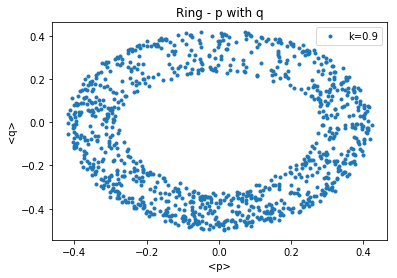

In [35]:
plt.clf()
plt.figure(figsize=(6,4))
plt.title('Ring - p with q')
plt.xlabel('<p>')
plt.ylabel('<q>')
plt.plot(p, q, '.', label='k=0.9')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

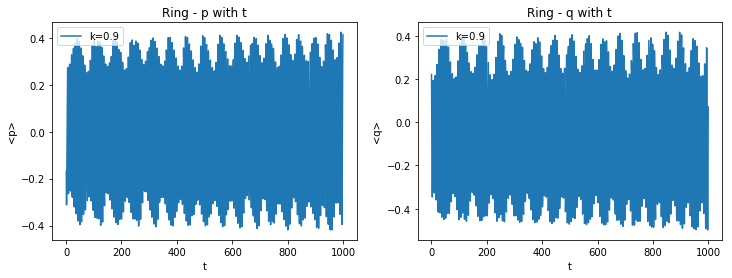

In [36]:
plt.clf()
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Ring - p with t')
plt.xlabel('t')
plt.ylabel('<p>')
plt.plot(id, p, label='k=0.9')
plt.legend(loc='upper left')
plt.subplot(122)
plt.title('Ring - q with t')
plt.xlabel('t')
plt.ylabel('<q>')
plt.plot(id, q, label='k=0.9')
plt.legend(loc='upper left')
plt.show()

## Map multiplication implemented

In [37]:
print(M * M * r)

0.340507 -0.263442 0.002089 -0.118777 0.200000 0.200000 



In [38]:
print(M * (M * r))

0.340805 -0.262074 0.002153 -0.118390 0.200000 0.200000 



### FVector() assign value

In [39]:
v = FVector()
print(v)
v[0] = .3
v[1] = .4
print(v)

0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 

0.300000 0.400000 0.000000 0.000000 0.000000 0.000000 



### ExpMap in series: Implement length
We know
$$ \exp({-:H:L})f(0) = ExpMap(-L*H)f(0) $$
Or
$$ \exp({-:H:L})f(0) = (ExpMap(-H))^{L}f(0) $$

#### Long length

In [40]:
Length = 100
M = fa.ExpMap(-Length*H, order)
print(M)

ClassicException: No convergence in ExpMap(H,map)

In [41]:
Length = 100
M = fa.ExpMap(-H, order)
for i in range(1, Length):
    M = fa.ExpMap(-H, order) * M
print(M)

FVps 6
Tps 1 4 4  6
    8.62318872287684e-01  1  0  0  0  0  0
   -5.06365641109753e-01  0  1  0  0  0  0
   -2.62724860139200e-01  1  0  1  0  0  0
    4.64779950018395e-02  1  0  0  1  0  0
    4.64779950018411e-02  0  1  1  0  0  0
   -1.26373952854203e-02  0  1  0  1  0  0
   -2.12045686556936e+01  3  0  0  0  0  0
   -3.61239725430688e+01  2  1  0  0  0  0
   -2.12100173879192e+01  1  2  0  0  0  0
   -2.33250255212631e+01  1  0  2  0  0  0
   -9.96973008703680e+01  1  0  1  1  0  0
    3.52099512113800e+01  1  0  0  2  0  0
   -3.61207729716859e+01  0  3  0  0  0  0
    5.99609310729923e+01  0  1  2  0  0  0
   -5.85409703380912e+01  0  1  1  1  0  0
   -3.97328502688546e+01  0  1  0  2  0  0
   -8.35829571148062e+01  3  0  1  0  0  0
   -1.16082680988881e+02  3  0  0  1  0  0
    1.60717704021449e+02  2  1  1  0  0  0
   -1.64723379405016e+02  2  1  0  1  0  0
    6.37608217600752e+01  1  2  1  0  0  0
   -1.82047142776394e+02  1  2  0  1  0  0
   -2.48446748590733e+01  1  0  3 

For long length, if we directly put the length inside the computation of ExpMap(), it would only truncate the order in the end so there is a explotion. In this case we should do multiplication. But for length<1 it is ok.

### Length < 1

In [42]:
Length = .5
M = fa.ExpMap(-Length*H, order)
print(M)

FVps 6
Tps 1 4 4  6
    8.77582561890373e-01  1  0  0  0  0  0
    4.79425538604203e-01  0  1  0  0  0  0
   -2.34844190117038e-01  1  0  1  0  0  0
   -3.91266974668365e-02  1  0  0  1  0  0
   -3.91266974668365e-02  0  1  1  0  0  0
   -9.99068610221628e-03  0  1  0  1  0  0
    4.78964549889058e-03  3  0  0  0  0  0
    2.42432135466777e-03  2  1  0  0  0  0
    4.05819546577822e-04  1  2  0  0  0  0
    5.26861004877963e-03  1  0  2  0  0  0
    3.05088648904182e-03  1  0  1  1  0  0
    2.55845542849805e-04  1  0  0  2  0  0
    2.94263218774891e-05  0  3  0  0  0  0
   -3.84132998907271e-04  0  1  2  0  0  0
    1.90555958385799e-04  0  1  1  1  0  0
    3.23689540652381e-05  0  1  0  2  0  0
   -6.47173638025480e-04  3  0  1  0  0  0
   -8.20265763555241e-05  3  0  0  1  0  0
   -2.65850672008818e-04  2  1  1  0  0  0
   -3.59580701327380e-05  2  1  0  1  0  0
   -4.42553549545347e-05  1  2  1  0  0  0
   -6.48609746000541e-06  1  2  0  1  0  0
    2.89066983109356e-04  1  0  3 